In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce


In [2]:
#-----------Soru 1
df = pd.read_excel('dataNonEmpty.xlsx', sheet_name=0) # can also index sheet by name or fetch all sheets
ylist = df['T_degC'].tolist()
xlist = df['Salnty'].tolist()
#print(np.nansum(ylist))


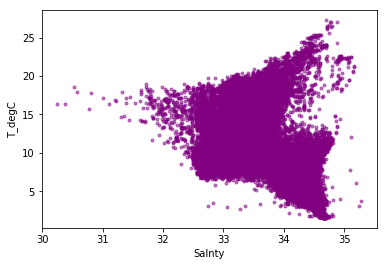

In [3]:
plt.scatter(xlist, ylist, color="purple", marker = ".", alpha=0.5)
plt.xlabel("Salnty")
plt.ylabel("T_degC")
plt.title ="Title"
plt.show()

y^ = -5.434255217635467x + 193.2744259481767


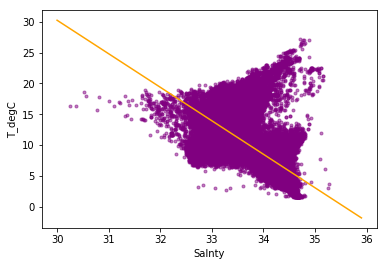

r^2 = 0.4065318993632984
r = -0.6375985409043202


In [4]:
#-------------------Soru 2-3
import math
Sxy=0
Sxx=0
sumXi = sum(xlist)
sumYi = sum(ylist)
ortx = sumXi / len(xlist)
orty = sumYi / len(ylist)

for i in range(len(xlist)):
    Sxy += (xlist[i]-ortx)*(ylist[i]-orty)
    Sxx += (xlist[i]-ortx)**2
b1 = Sxy/Sxx
b0 = orty-b1*ortx

print("y^ = {}x + {}".format(b1,b0))

plt.scatter(xlist, ylist, color="purple", marker = ".", alpha=0.5)
plt.xlabel("Salnty")
plt.ylabel("T_degC")
plt.title ="Title"

m = np.arange(30,36,0.1)
n = b1 * m + b0
plt.plot(m,n, color = 'orange')
plt.show()

n=len(xlist)
SStot = 0
SSreg = 0
s=0
aa=0
bb=0

for i in range(n):
    x=float(xlist[i])
    y=float(ylist[i])
    ySapka = b1 * xlist[i] + b0
    SStot += ( ylist[i] - orty )**2
    SSreg += (ySapka - orty)**2
    s += (x - ortx) * (y - orty)
    aa += (x - ortx) * (x - ortx)
    bb += (y - orty) * (y - orty)

r2=SSreg/SStot 
Sxy = s / (n - 1)
Sx = math.sqrt((1 / (n - 1)) * aa)
Sy = math.sqrt((1 / (n - 1)) * bb)
r = Sxy / (Sx * Sy)
print("r^2 = {}".format(r2))
print("r = {}".format(r))
#r -0.6376 cikti. Yani -1'e yakin. Bu demek oluyor ki sicaklik ve tuzluluk arasinda bir baglanti yokmus. 1'e yaklastikca r 
# iki parametre arasindaki iliskinin daha kuvvetli oldugunu anlariz.

# Grafikte de gorundugu gibi regresyon pek verimli olmadi. R^2 de 0.4 cikti. Yani 1'e degil 0'a daha yakin
# Bu da kotu bir lineer regresyon oldugunu matematiksel olarak gosteriyor.


B1: -3.0170332711568335
B2: 197.85470238141716
B3: -3230.20055039227


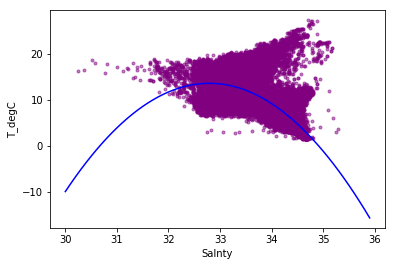

5550.2985080887165


In [5]:
#------------------Soru 4
toplamXi4 = 0.0
toplamXi3 = 0.0
toplamXi2 = 0.0
toplamXi = 0.0
toplamYi = 0.0
toplamYiXi2 = 0.0
toplamYiXi = 0.0

for i in range(len(xlist)):
    toplamXi4 += (float(xlist[i]) * float(xlist[i]) * float(xlist[i]) * float(xlist[i]))
    toplamXi3 += (float(xlist[i]) * float(xlist[i]) * float(xlist[i]))
    toplamXi2 += (float(xlist[i]) * float(xlist[i]))
    toplamXi += float(xlist[i]) 
    toplamYiXi2 += float(xlist[i]) * float(xlist[i]) * float(ylist[i])
    toplamYiXi += float(xlist[i]) * float(ylist[i])
    toplamYi += float(ylist[i])

n = len(xlist)


import scipy as sc
A = [[toplamXi4, toplamXi3, toplamXi2] 
    ,[toplamXi3, toplamXi2, toplamXi]
    ,[toplamXi2, toplamXi, n]]
A = sc.mat(A)

B1 = 0.0
B2 = 0.0
B3 = 0.0
B = [[B1], [B2], [B3]]

C = [[toplamYiXi2], [toplamYiXi], [toplamYi]]
C = sc.mat(C)

B = A.I.dot(C)
B1 = float(B[0])
B2 = float(B[1])
B3 = float(B[2])


import matplotlib.pyplot as plt
import numpy as np

x = np.arange(30,36,0.1)
y = (B1 * x * x) + (B2 * x) + B3

print("B1: {}".format(B1))
print("B2: {}".format(B2))
print("B3: {}".format(B3))


plt.scatter(xlist, ylist, color="purple", marker = ".", alpha=0.5)
plt.xlabel("Salnty")
plt.ylabel("T_degC")
plt.title ="Title"
plt.plot(x, y, color="blue")
plt.show()

#---------R^2
import math
SS_reg = 0
SS_top = 0


for i in range(len(xlist)):
    ysapka = (B1 * float(ylist[i]) * float(ylist[i])) + (B2 * float(ylist[i])) + B3
    y = float(xlist[i])
    x = float(ylist[i])
    SS_reg += (ysapka - orty) ** 2
    SS_top += (y - orty) ** 2
Rkare = SS_reg / SS_top
print("R^2:{}".format(Rkare))
# R^2 hesabinda bir yanlislik oldugu icin yorum yapamdim. Ama hanginsini r^2 si 1'e daha yakin olsaydi o daha iyi -
# yakinsardi.


In [6]:
#-------------Soru 6 Salnty
import random
import math
size = len(xlist)
randI =random.sample(range(size), 1000)
sampSalnty =[]
for i in randI:
    sampSalnty.append(xlist[i])
#1000 tane rastgele populationdan secerek bir sample olusturduk.

xCizgi = (1/n)* sum(xlist)
temp =0
for i in range(len(xlist)):
    temp +=(xlist[i] - ortx)**2
var2 = (1/n) *temp
ro = math.sqrt(var2)
print('ro='+str(ro))
print("XCizgi = "+str(xCizgi))
# 1-0.95 = 0.5
Za2 = 1.960 #-> Talodan okunan deger
ustInterval = xCizgi + Za2 * (ro/math.sqrt(size))
altInterval = xCizgi - Za2 * (ro/math.sqrt(size))

print("Confidence interval for salnty: [{}, {}]".format(altInterval,ustInterval))


ro=0.5285060783430697
XCizgi = 33.877608169418416
Confidence interval for salnty: [33.87370161012416, 33.88151472871267]


In [7]:
#-------------Soru 6 Degree
import random
import math
size = len(ylist)
randI =random.sample(range(size), 1000)
sampSalnty =[]
for i in randI:
    sampSalnty.append(ylist[i])
#1000 tane rastgele populationdan secerek bir sample olusturduk.

xCizgi = (1/n)* sum(ylist)
temp =0
for i in range(len(ylist)):
    temp +=(ylist[i] - orty)**2
var2 = (1/n) *temp
ro = math.sqrt(var2)
print('ro='+str(ro))
print("XCizgi = "+str(xCizgi))
# 1-0.95 = 0.5
Za2 = 1.960 #-> Talodan okunan deger
ustInterval = xCizgi + Za2 * (ro/math.sqrt(size))
altInterval = xCizgi - Za2 * (ro/math.sqrt(size))

print("Confidence interval for degree: [{}, {}]".format(altInterval,ustInterval))


ro=4.504459670993618
XCizgi = 9.174856992504738
Confidence interval for degree: [9.141561370156344, 9.208152614853132]


In [8]:
#-------------Soru 7
# margin 0.1, %90 confidence
# 1-0.9 = 0.1
#Za/2 = 0.05 = 1.45 oalrak tablodan okudum.
margin = 0.1
atLeast =( (1.45) * ro / margin)
print("n >= {}".format(atLeast))
print("n must be taken at least {}".format(atLeast))


n >= 65.31466522940745
n must be taken at least 65.31466522940745
